# Lecture 5: Optimization via gradient ascent

First of all, let's import packages needed

In [1]:
# First, we load needed packages
%matplotlib inline
# Allows viewing figures inline in the notebook
import numpy as np
# Numpy is a library for numerical computation
import matplotlib.pyplot as plt
# Matplotlib is a plotting library
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,8)
# Makes the figures larger

### Part 1: The Hessian and its eigendecomposition

In order to verify that the eigendecomposition of the Hessian corresponds to a choice of basis that simplifies the Hessian, let's look at the following function:

$g(x,y) = e^{-(x^2 + xy + y^2)}$

First, we make a contour plot og $g$:

Text(0.5,1,'Contour plot of the function g')

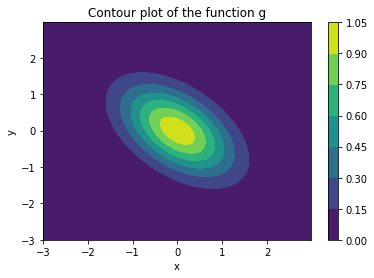

In [2]:
# Defining the function g(x,y) on the 2D plane
def g(x,y):
    return np.exp(-(x**2 + x*y + y**2))

# Next, use meshgrid to make a contour plot of the function in the domain [-2, 4] x [-4, 4]
delta = 0.025                                   # width of bin in grid
x = np.arange(-3.0, 3.0, delta)                 # x-coordinates of grid nodes
y = np.arange(-3.0, 3.0, delta)                 # y-coordinates of grid nodes
X, Y = np.meshgrid(x, y)                        # turning the coordinates into a "meshgrid" object
Z = g(X, Y)                                  # evaluating the function on the grid

# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function g')  # adding a figure title

Next, we compute the Hessian of $g$:

$H = \left( \begin{array}{cc} 
\frac{\partial^2 g}{\partial^2 x} & \frac{\partial^2 g}{\partial x \partial y}\\
\frac{\partial^2 g}{\partial x \partial y} & \frac{\partial^2 g}{\partial^2 y}
\end{array} \right) $

and its eigendecomposition $H = Q^T \Lambda Q$, where $Q$ is the matrix of eigenvectors and $\Lambda$ is the diagonal matrix of eigenvalues.

A bit of blood, sweat and tears shows that

$\frac{\partial g}{\partial x} = -(2x + y)e^{-(x^2 + xy + y^2)}$

$\frac{\partial g}{\partial y} = -(x + 2y)e^{-(x^2 + xy + y^2)}$

$\frac{\partial^2 g}{\partial^2 x} = 2(4x^2 + 4xy + y^2 - 1)e^{-(x^2 + xy + y^2)}$

$\frac{\partial^2 g}{\partial x \partial y} = (2x^2 + 5xy + 2y^2 + 1)e^{-(x^2 + xy + y^2)}$

$\frac{\partial^2 g}{\partial^2 y} = (x^2 + 4xy + 4y^2 - 2)e^{-(x^2 + xy + y^2)}$

In [3]:
def ggrad(x,y):
    exp = -(x**2 + x*y + y**2)
    dx = -(2*x+y)*np.exp(exp)
    dy = -(x + 2*y)*np.exp(exp)
    return np.array([dx, dy])

def ghessian(x,y):
    exp = -(x**2 + x*y + y**2)
    ddxx = 2*(4*x**2 + 4*x*y + y**2 - 1)*np.exp(exp)
    ddxy = (2*x**2 + 5*x*y + 2*y**2 + 1)*np.exp(exp)
    ddyy = (x**2 + 4*x*y + 4*y**2 -2)*np.exp(exp)
    
    return np.array([[ddxx, ddxy], [ddxy, ddyy]])

By looking at $g$ and its plot, one might guess that its maximum is found at $(0,0)$. Let's verify this by computing the gradient and Hessian at $(0,0)$, and taking the eigendecomposition of the Hessian.

In [4]:
grad0 = ggrad(0,0)
hess0 = ghessian(0,0)
print('Gradient of g at (0,0):', grad0)
print('Hessian of g at (0,0):')
print(hess0)

Gradient of g at (0,0): [0. 0.]
Hessian of g at (0,0):
[[-2.  1.]
 [ 1. -2.]]


Now, let's look at the eigendecomposition of the Hessian.

In [5]:
evals, evecs = np.linalg.eigh(hess0)
print('Eigenvalues of Hessian:', evals)
print('Eigenvectors of Hessian:', evecs)

Eigenvalues of Hessian: [-3. -1.]
Eigenvectors of Hessian: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Since both eigenvalues are negative, the Hessian is *negative definite*, and the critical point of $g$ at $(0,0)$ is a *maximum*. This is in agreement with what we expect from the plot.

Let's additionally plot the eigenvectors on top of the contour plot.

(-3.0, 2.9749999999999783, -3.0, 2.9749999999999783)

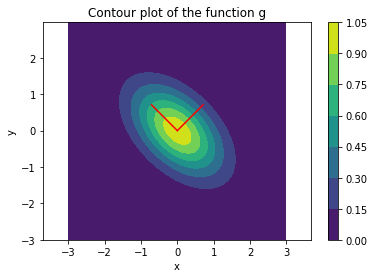

In [6]:
# Plot the level set of the g
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function g')     # adding a figure title

# Next, add the eigenvectors on top.

plt.plot([0, evecs[0,0]], [0, evecs[0,1]], 'r')    # Plotting first eigenvector in red
plt.plot([0, evecs[1,0]], [0, evecs[1,1]], 'r')    # Plotting second eigenvector in red
plt.axis('equal')                                  # Stretching the axes to equal scale
                                                   # Makes eigenvectors plot orthogonally

From the plot you see that indeed, the new basis given by the eigenvector does capture the geometry of the maximum (in particular, in the new basis, the partial $\frac{\partial g}{\partial x}$ at $(0,0)$ is independent of $y$, and vice versa).

**Another example: A saddle point**

Next, let's look at the function 

$h(x,y) = x^4 + y^4 - 4xy + 1$,

also found in Example 3 on page 961 of Stewart.

We start by plotting it, along with its critical points which can be found at (0,0), (1,1) and (-1, -1).

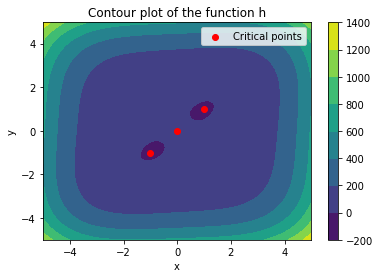

In [7]:
# Defining the function g(x,y) on the 2D plane
def h(x,y):
    return x**4  + y**4 - 4*x*y + 1

# Next, use meshgrid to make a contour plot of the function in the domain [-2, 4] x [-4, 4]
delta = 0.025                                   # width of bin in grid
x = np.arange(-5.0, 5.0, delta)                 # x-coordinates of grid nodes
y = np.arange(-5.0, 5.0, delta)                 # y-coordinates of grid nodes
X, Y = np.meshgrid(x, y)                        # turning the coordinates into a "meshgrid" object
Z = h(X, Y)                                  # evaluating the function on the grid

# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function h')  # adding a figure title
plt.scatter([0, 1, -1], [0, 1, -1], color='red', label='Critical points')
plt.legend()

Next, note that the second partial derivatives are given by

$\frac{\partial^2 h}{\partial^2 x} = 12x^2$,

$\frac{\partial^2 h}{\partial x \partial y} = -4$,

$\frac{\partial^2 h}{\partial^2 x} = 12y^2$.

We use these to implement and evaluate the Hessian at the three critical points:

In [8]:
def hHessian(x,y):
    ddxx = 12*x**2
    ddxy = -4
    ddyy = 12*y**2
    
    H = np.array([[ddxx, ddxy], [ddxy, ddyy]])
    
    return H

H0 = hHessian(0,0)
H1 = hHessian(1,1)
H2 = hHessian(-1, -1)

evals0, evecs0 = np.linalg.eigh(H0)
evals1, evecs1 = np.linalg.eigh(H1)
evals2, evecs2 = np.linalg.eigh(H2)

print('Eigenvalues at (0,0):', evals0)
print('Eigenvalues at (1,1):', evals1)
print('Eigenvalues at (-1,-1):', evals2)

Eigenvalues at (0,0): [-4.  4.]
Eigenvalues at (1,1): [ 8. 16.]
Eigenvalues at (-1,-1): [ 8. 16.]


Interpreting the above, we see that the function has local minima at $(1,1)$ and $(-1, -1)$, and a saddle point at $(0,0)$.

### Part 2: Gradient ascent

Throughout the lecture, we will use a toy function to illustrate the behavior of gradient ascent, namely:

$f(x,y) = 1.5 e^{-(x^2 + xy + y^2)} + 2e^{-\left( (x-1.5)^2 + (y-1.5)^2\right)}$

In [9]:
# Defining the function f(x,y) on the 2D plane
def f(x,y):
    z1 = 1.5*np.exp(-(x**2 + x*y + y**2))
    z2 = 2*np.exp(-((x - 1.5)**2 + (y - 1.5)**2))
    z = (z1 + z2)
    return z

Before proceeding to optimization, let's make a contour plot of the function f:

Text(0.5,1,'Contour plot of the function f')

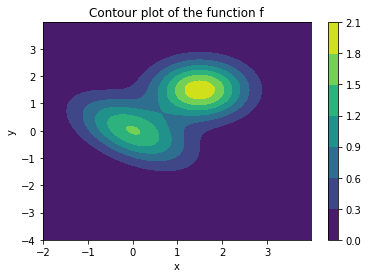

In [10]:
# Next, use meshgrid to make a contour plot of the function in the domain [-2, 4] x [-4, 4]
delta = 0.025                                   # width of bin in grid
x = np.arange(-2.0, 4.0, delta)                 # x-coordinates of grid nodes
y = np.arange(-4.0, 4.0, delta)                 # y-coordinates of grid nodes
X, Y = np.meshgrid(x, y)                        # turning the coordinates into a "meshgrid" object
Z = f(X, Y)                                  # evaluating the function on the grid

# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function f')  # adding a figure title

Note that $f$ has two maxima; we will next try to find these using gradient ascent.


### Moving to Gradient ascent

In order to perform gradient ascent, we will need the gradient

$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$.

With a bit of blood, sweat and tears, we compute the partial derivatives:

$\frac{\partial f}{\partial x} = -1.5(2x + y)e^{-(x^2 + xy+ y)^2} - 4(x-1.5)e^{-((x-1.5)^2 + (y-1.5)^2)}$

$\frac{\partial f}{\partial y} = -1.5(x + 2y)e^{-(x^2 + xy+ y)^2} - 4(y-1.5)e^{-((x-1.5)^2 + (y-1.5)^2)}$

We use these to implement the gradient of f at a given point $(x,y)$:

In [11]:
def fgrad(x,y):
    exp1 = -(x**2 + x*y + y**2)
    exp2 = -((x-1.5)**2 + (y-1.5)**2)
    fx = -1.5*(2*x + y)*np.exp(exp1) - 4*(x-1.5)*np.exp(exp2)
    fy = -1.5*(x + 2*y)*np.exp(exp1) - 4*(y-1.5)*np.exp(exp2)
    return np.array([fx, fy])

In [12]:
def gradasc(init_loc):
    # Gradient ascent starting at the point specified by init_loc (a 2D vector)
    cur_est = np.array(init_loc) 
    
    # Set variables for determining convergence.
    convergence = False      # variable keeping track of convergence
    num_iter = 0             # number of iterations so far
    max_iter = 10000         # maximum number of iterations
    conv_thr = 0.001        # threshold for convergence 
    
    # Set learning rate (step length parameter). You will want to play with this.
    learningrate = 0.1
    
    # For the sake of plotting: points visited along trajectory
    points_visited = []
    
    # Iterative loop
    while not(convergence):
        # keep track of points visited
        points_visited.append(cur_est)
        
        # compute the gradient at the current location        
        grad = fgrad(cur_est[0], cur_est[1])
        
        # define step (and its length)       
        step = learningrate*grad
        
        # take a step in the stepping direction
        cur_est = cur_est + step        

        # check for convergence/stopping
        if num_iter == max_iter:
            print('reached max_iter')
            convergence = True
        elif np.linalg.norm(grad) < conv_thr:
            convergence = True
            print('converged')
            
        # update counter
        num_iter+=1
            
    return cur_est, np.array(points_visited)

Let's try it!

In [13]:
found_maximum, points_visited = gradasc([-1,2])
print('Found maximum:', found_maximum)

converged
Found maximum: [0.01579111 0.01650368]


Now, let's plot the gradient ascent trajectory on top of the topographic function plot to see how gradient ascent behaves with different starting points

converged


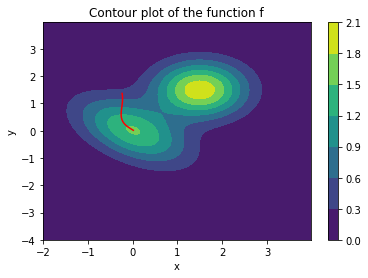

In [14]:
# Select an initial starting point.
# Standard approach: Draw normally distributed initial values for x and y.
#    np.random.normal(0,1,2) draws two numbers from the normal distribution with
#    mean 0 and standard deviation 1
init_loc = np.random.normal(0, 1, 2) 
#init_loc = [-1,2]
found_maximum, points_visited = gradasc(init_loc)


# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function f')  # adding a figure title

# Add trajectory
plt.plot(points_visited[:,0], points_visited[:,1], 'r')